In [145]:
import pandas as pd

In [146]:
experiments = 5
epochs = 100

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU', 'ThresholdedReLU', 'selu']
# activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'softplus']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
            'data' : [pd.read_csv('./logs/mnist_' + act +'_' + opt + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [147]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [148]:
check = check.sort_values(by=['val_acc'])
check

config  exp       acc      loss  val_acc  val_loss  \
382  ThresholdedReLU_Nadam  2.0  0.721283  0.749687   0.7989  0.577205   
350   ThresholdedReLU_rmsp  0.0  0.823900  0.646727   0.8400  0.576850   
353   ThresholdedReLU_rmsp  3.0  0.849533  0.577091   0.8548  0.526089   
352   ThresholdedReLU_rmsp  2.0  0.836450  0.638381   0.8558  0.535514   
354   ThresholdedReLU_rmsp  4.0  0.854300  0.582374   0.8896  0.461609   
351   ThresholdedReLU_rmsp  1.0  0.867900  0.549635   0.8916  0.457510   
384  ThresholdedReLU_Nadam  4.0  0.824033  0.544084   0.9040  0.415756   
138           linear_Nadam  3.0  0.915733  0.297304   0.9114  0.327159   
381  ThresholdedReLU_Nadam  1.0  0.874600  0.372188   0.9145  0.299993   
383  ThresholdedReLU_Nadam  3.0  0.837867  0.470168   0.9147  0.344527   
135           linear_Nadam  0.0  0.916783  0.297308   0.9165  0.327210   
105            linear_rmsp  0.0  0.920033  0.296879   0.9174  0.303291   
136           linear_Nadam  1.0  0.916217  0.298338   0.9180  0.303115   
137           linear_Nadam  2.0  0.916283  0.297361   0.9194  0.313953   
110            linear_adam  0.0  0.922067  0.273301   0.9196  0.302780   
359   ThresholdedReLU_adam  4.0  0.873900  0.367020   0.9198  0.282945   
356   ThresholdedReLU_adam  1.0  0.875300  0.355237   0.9199  0.278657   
114            linear_adam  4.0  0.923800  0.272701   0.9208  0.294002   
139           linear_Nadam  4.0  0.915517  0.295767   0.9212  0.314207   
358   ThresholdedReLU_adam  3.0  0.900017  0.298714   0.9223  0.276472   
130          linear_Adamax  0.0  0.925017  0.269785   0.9230  0.291033   
106            linear_rmsp  1.0  0.919383  0.295300   0.9231  0.295486   
109            linear_rmsp  4.0  0.920733  0.297134   0.9232  0.291917   
116             linear_sgd  1.0  0.921467  0.279663   0.9233  0.271234   
112            linear_adam  2.0  0.923467  0.273481   0.9235  0.296297   
108            linear_rmsp  3.0  0.919067  0.296410   0.9239  0.293230   
118             linear_sgd  3.0  0.922417  0.279216   0.9240  0.269833   
119             linear_sgd  4.0  0.922650  0.277152   0.9240  0.271041   
134          linear_Adamax  4.0  0.925700  0.269057   0.9240  0.279397   
111            linear_adam  1.0  0.923883  0.272846   0.9241  0.294666   
..                     ...  ...       ...       ...      ...       ...   
143               elu_rmsp  3.0  0.983117  0.060523   0.9788  0.107819   
171              elu_Nadam  1.0  0.987750  0.038436   0.9788  0.109703   
170              elu_Nadam  0.0  0.987067  0.041983   0.9788  0.106366   
202        softplus_Adamax  2.0  0.979833  0.060446   0.9789  0.081076   
141               elu_rmsp  1.0  0.983417  0.061237   0.9789  0.105688   
414            selu_Adamax  4.0  0.979683  0.061990   0.9789  0.117623   
174              elu_Nadam  4.0  0.988583  0.037495   0.9789  0.114674   
198      softplus_Adadelta  3.0  0.972967  0.089329   0.9791  0.075178   
145               elu_adam  0.0  0.988783  0.034203   0.9791  0.090214   
146               elu_adam  1.0  0.989100  0.032499   0.9791  0.090846   
409          selu_Adadelta  4.0  0.974533  0.082274   0.9791  0.104340   
161           elu_Adadelta  1.0  0.977950  0.070439   0.9792  0.072228   
144               elu_rmsp  4.0  0.983467  0.062218   0.9793  0.110772   
142               elu_rmsp  2.0  0.984283  0.058307   0.9793  0.107401   
412            selu_Adamax  2.0  0.980450  0.058462   0.9793  0.109904   
147               elu_adam  2.0  0.988100  0.035446   0.9795  0.092818   
160           elu_Adadelta  0.0  0.978000  0.069487   0.9795  0.074649   
165             elu_Adamax  0.0  0.984350  0.045434   0.9795  0.070867   
164           elu_Adadelta  4.0  0.979267  0.065368   0.9796  0.067330   
149               elu_adam  4.0  0.988517  0.033124   0.9798  0.090202   
200        softplus_Adamax  0.0  0.979667  0.062003   0.9799  0.070246   
169             elu_Adamax  4.0  0.985367  0.043265   0.9802  0.076731   
172              elu_Nad

In [149]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        
        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch+1
        
        if(av_val_acc > max_val_acc):
            max_val_acc = av_val_acc
            data[d]['best']['max_val_acc'] = max_acc
            data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch+1
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch+1
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss)}, ignore_index=True)
    


In [150]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [151]:
results.head()

config       acc      loss  val_acc  val_loss       opt      act  \
0      sigmoid_rmsp  0.978913  0.074216  0.97536  0.117133      rmsp  sigmoid   
1      sigmoid_adam  0.985620  0.043641  0.97500  0.103063      adam  sigmoid   
2       sigmoid_sgd  0.910493  0.302254  0.93542  0.217570       sgd  sigmoid   
3   sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   Adagrad  sigmoid   
4  sigmoid_Adadelta  0.968043  0.105081  0.97312  0.089392  Adadelta  sigmoid   

   max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
0          100.0               87.0           100.0                33.0  
1           96.0               83.0           100.0                29.0  
2          100.0              100.0           100.0               100.0  
3          100.0               99.0           100.0               100.0  
4          100.0               96.0           100.0                99.0

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

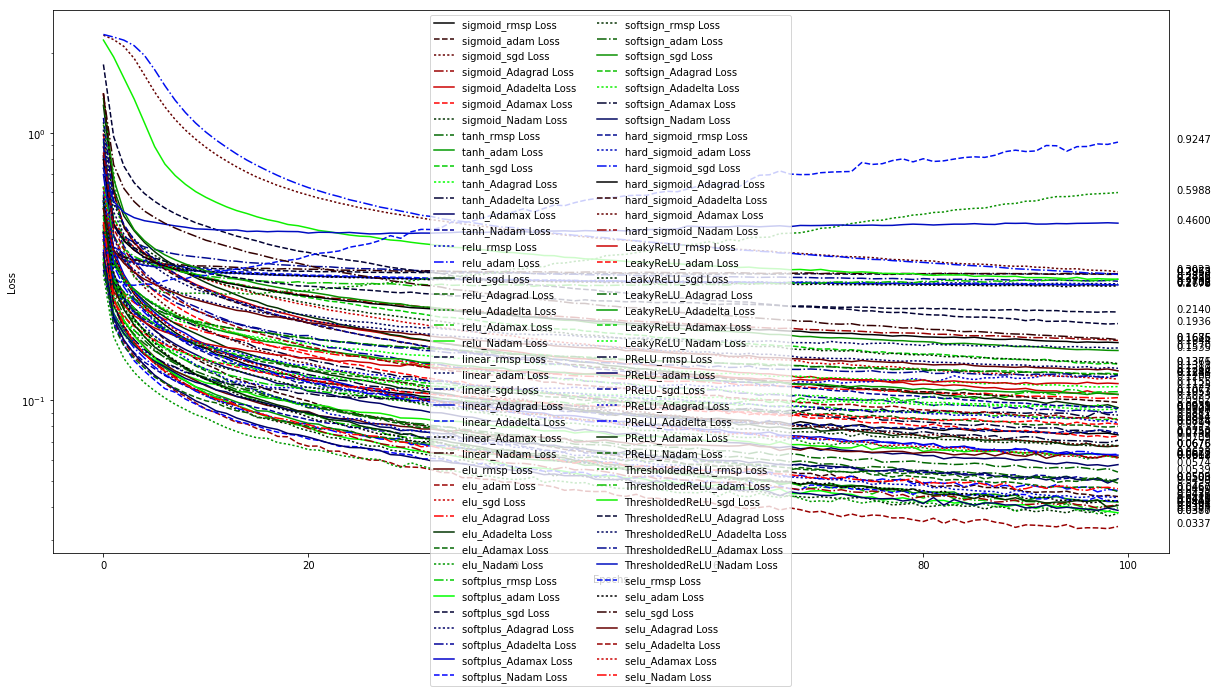

In [153]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

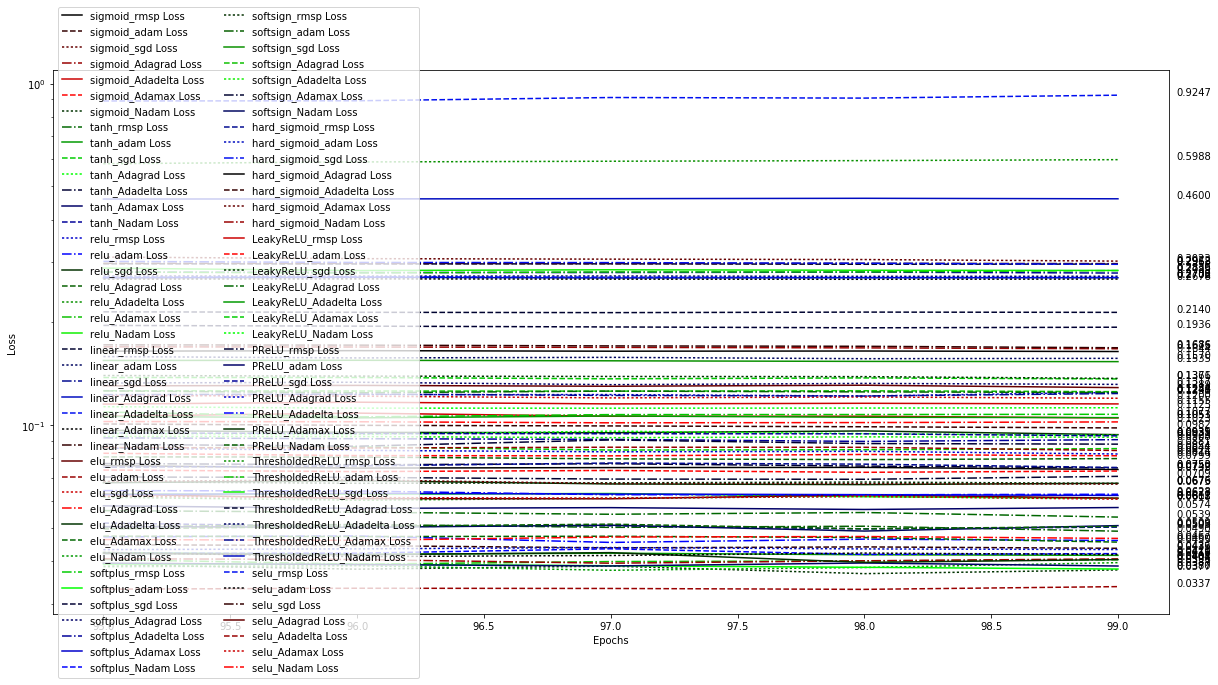

In [154]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [155]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

config       acc      loss  val_acc  val_loss       opt  \
29                  elu_adam  0.988687  0.033712  0.97968  0.089690      adam   
6              sigmoid_Nadam  0.987793  0.037723  0.97544  0.107565     Nadam   
36             softplus_adam  0.987787  0.037954  0.97702  0.105827      adam   
64                PReLU_adam  0.987460  0.038732  0.97650  0.118037      adam   
34                 elu_Nadam  0.987680  0.039620  0.97882  0.108755     Nadam   
19               relu_Adamax  0.986827  0.040390  0.97728  0.095483    Adamax   
68              PReLU_Adamax  0.986487  0.040450  0.97770  0.095461    Adamax   
55        hard_sigmoid_Nadam  0.986770  0.040654  0.97450  0.110592     Nadam   
8                  tanh_adam  0.985957  0.041617  0.97464  0.106411      adam   
78                 selu_adam  0.986233  0.041855  0.97674  0.159491      adam   
41            softplus_Nadam  0.987423  0.042108  0.97602  0.123187     Nadam   
50         hard_sigmoid_adam  0.985907  0.043277  0.97606  0.101438      adam   
1               sigmoid_adam  0.985620  0.043641  0.97500  0.103063      adam   
33                elu_Adamax  0.984523  0.045499  0.98084  0.071118    Adamax   
15                 relu_adam  0.985303  0.045998  0.97512  0.113523      adam   
83                selu_Nadam  0.985200  0.046654  0.97680  0.179598     Nadam   
43             softsign_adam  0.983850  0.048978  0.97454  0.099006      adam   
13                tanh_Nadam  0.983687  0.050334  0.97254  0.113199     Nadam   
69               PReLU_Nadam  0.984313  0.050563  0.97482  0.124574     Nadam   
48            softsign_Nadam  0.983500  0.050855  0.97432  0.101341     Nadam   
7                  tanh_rmsp  0.982883  0.053859  0.97486  0.104121      rmsp   
12               tanh_Adamax  0.981003  0.057444  0.97680  0.083788    Adamax   
82               selu_Adamax  0.980127  0.060768  0.97884  0.113004    Adamax   
18             relu_Adadelta  0.981770  0.061083  0.97630  0.101447  Adadelta   
20                relu_Nadam  0.980980  0.061105  0.97308  0.126795     Nadam   
28                  elu_rmsp  0.983497  0.061194  0.97880  0.108794      rmsp   
40           softplus_Adamax  0.979297  0.062319  0.97924  0.074658    Adamax   
67            PReLU_Adadelta  0.980833  0.062821  0.97692  0.091229  Adadelta   
54       hard_sigmoid_Adamax  0.978373  0.067276  0.97574  0.082619    Adamax   
42             softsign_rmsp  0.978887  0.067614  0.97384  0.098522      rmsp   
..                       ...       ...       ...      ...       ...       ...   
30                   elu_sgd  0.962677  0.119972  0.97278  0.089128       sgd   
75    ThresholdedReLU_Adamax  0.960390  0.123845  0.96184  0.152807    Adamax   
59         LeakyReLU_Adagrad  0.961317  0.124699  0.96916  0.105576   Adagrad   
14                 relu_rmsp  0.976800  0.124815  0.97424  0.190692      rmsp   
45          softsign_Adagrad  0.961723  0.125398  0.96590  0.111659   Adagrad   
80              selu_Adagrad  0.960420  0.128891  0.97046  0.120758   Adagrad   
38          softplus_Adagrad  0.958570  0.131712  0.97086  0.095806   Adagrad   
9                   tanh_sgd  0.957740  0.136649  0.96728  0.105689       sgd   
58             LeakyReLU_sgd  0.958117  0.137139  0.96798  0.104932       sgd   
44              softsign_sgd  0.953203  0.153544  0.96220  0.122889       sgd   
74  ThresholdedReLU_Adadelta  0.953463  0.156975  0.96306  0.151015  Adadelta   
52      hard_sigmoid_Adagrad  0.950757  0.164375  0.96182  0.126474   Adagrad   
3            sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   Adagrad   
79                  selu_sgd  0.948213  0.168605  0.96404  0.133931       sgd   
37              softplus_sgd  0.939670  0.193622  0.96046  0.124559       sgd   
73   ThresholdedReLU_Adagrad  0.932597  0.213993  0.95684  0.144692   Adagrad   
26             linear_Adamax  0.925773  0.267834  0.92468  0.283705    Adamax   
24            linear_Adagrad  0.924800  0.270222  0.9

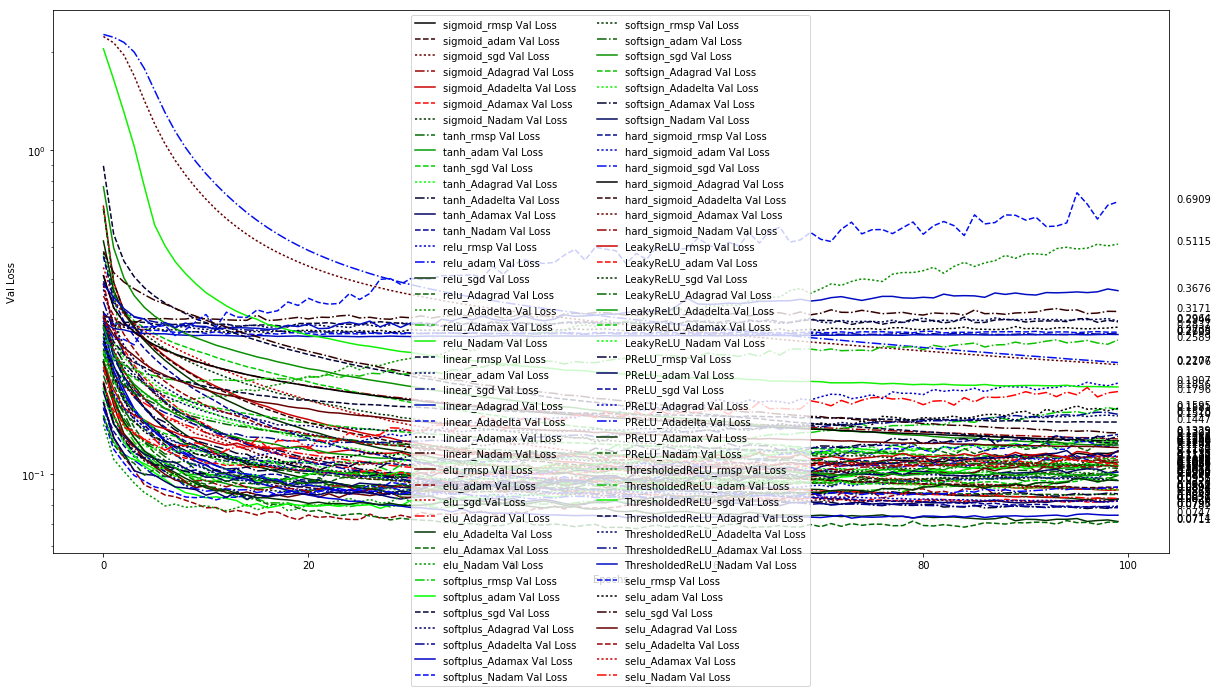

In [156]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

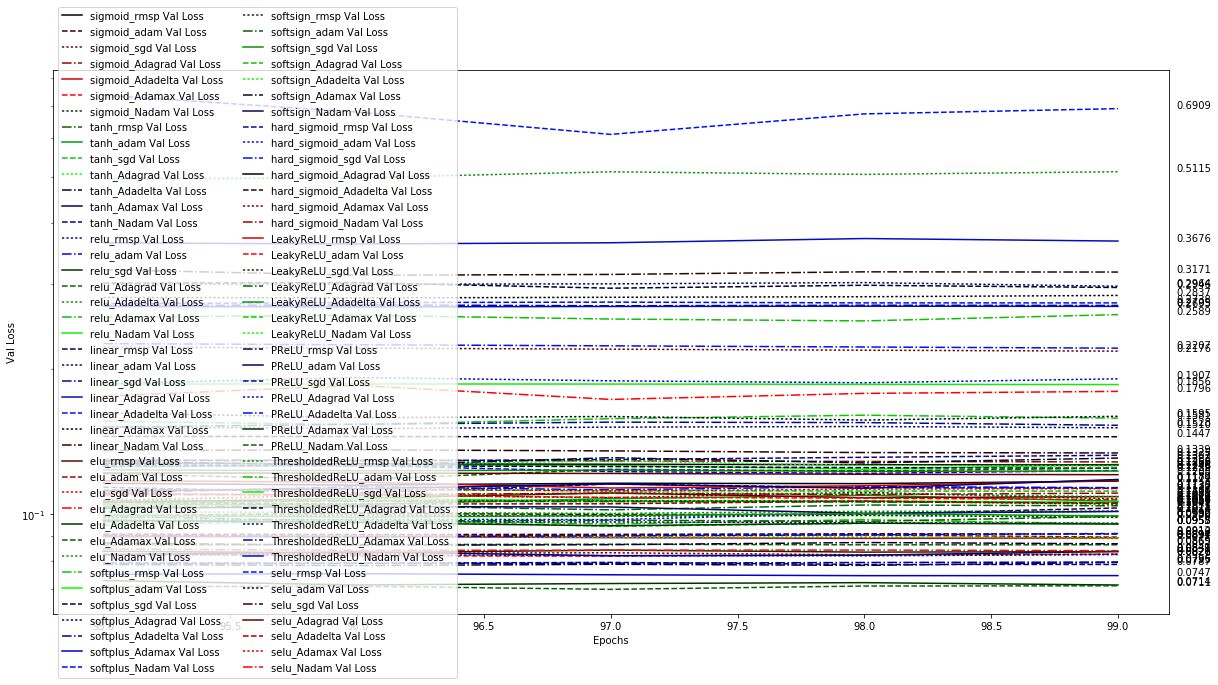

In [157]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [158]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

config       acc      loss  val_acc  val_loss       opt  \
33                elu_Adamax  0.984523  0.045499  0.98084  0.071118    Adamax   
32              elu_Adadelta  0.978513  0.067637  0.97944  0.071386  Adadelta   
40           softplus_Adamax  0.979297  0.062319  0.97924  0.074658    Adamax   
65                 PReLU_sgd  0.970650  0.093120  0.97628  0.078734       sgd   
11             tanh_Adadelta  0.975720  0.075027  0.97656  0.079506  Adadelta   
39         softplus_Adadelta  0.972440  0.090753  0.97742  0.079648  Adadelta   
66             PReLU_Adagrad  0.973830  0.082395  0.97562  0.082568   Adagrad   
54       hard_sigmoid_Adamax  0.978373  0.067276  0.97574  0.082619    Adamax   
5             sigmoid_Adamax  0.976383  0.073460  0.97598  0.082673    Adamax   
16                  relu_sgd  0.970477  0.093866  0.97470  0.083706       sgd   
12               tanh_Adamax  0.981003  0.057444  0.97680  0.083788    Adamax   
31               elu_Adagrad  0.967640  0.102279  0.97428  0.084078   Adagrad   
17              relu_Adagrad  0.975017  0.079879  0.97486  0.086467   Adagrad   
47           softsign_Adamax  0.977220  0.070874  0.97538  0.086875    Adamax   
30                   elu_sgd  0.962677  0.119972  0.97278  0.089128       sgd   
4           sigmoid_Adadelta  0.968043  0.105081  0.97312  0.089392  Adadelta   
46         softsign_Adadelta  0.971163  0.092259  0.97290  0.089413  Adadelta   
29                  elu_adam  0.988687  0.033712  0.97968  0.089690      adam   
53     hard_sigmoid_Adadelta  0.970303  0.098230  0.97342  0.090994  Adadelta   
67            PReLU_Adadelta  0.980833  0.062821  0.97692  0.091229  Adadelta   
68              PReLU_Adamax  0.986487  0.040450  0.97770  0.095461    Adamax   
19               relu_Adamax  0.986827  0.040390  0.97728  0.095483    Adamax   
61          LeakyReLU_Adamax  0.972533  0.085437  0.97374  0.095715    Adamax   
38          softplus_Adagrad  0.958570  0.131712  0.97086  0.095806   Adagrad   
42             softsign_rmsp  0.978887  0.067614  0.97384  0.098522      rmsp   
10              tanh_Adagrad  0.964903  0.112521  0.96992  0.099005   Adagrad   
43             softsign_adam  0.983850  0.048978  0.97454  0.099006      adam   
60        LeakyReLU_Adadelta  0.967997  0.105269  0.97330  0.099191  Adadelta   
48            softsign_Nadam  0.983500  0.050855  0.97432  0.101341     Nadam   
50         hard_sigmoid_adam  0.985907  0.043277  0.97606  0.101438      adam   
..                       ...       ...       ...      ...       ...       ...   
37              softplus_sgd  0.939670  0.193622  0.96046  0.124559       sgd   
69               PReLU_Nadam  0.984313  0.050563  0.97482  0.124574     Nadam   
62           LeakyReLU_Nadam  0.970883  0.093463  0.97178  0.125859     Nadam   
52      hard_sigmoid_Adagrad  0.950757  0.164375  0.96182  0.126474   Adagrad   
20                relu_Nadam  0.980980  0.061105  0.97308  0.126795     Nadam   
3            sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   Adagrad   
63                PReLU_rmsp  0.978543  0.088051  0.97614  0.130723      rmsp   
49         hard_sigmoid_rmsp  0.979187  0.075251  0.97412  0.132470      rmsp   
79                  selu_sgd  0.948213  0.168605  0.96404  0.133931       sgd   
73   ThresholdedReLU_Adagrad  0.932597  0.213993  0.95684  0.144692   Adagrad   
74  ThresholdedReLU_Adadelta  0.953463  0.156975  0.96306  0.151015  Adadelta   
75    ThresholdedReLU_Adamax  0.960390  0.123845  0.96184  0.152807    Adamax   
35             softplus_rmsp  0.978280  0.107673  0.97636  0.158071      rmsp   
78                 selu_adam  0.986233  0.041855  0.97674  0.159491      adam   
83                selu_Nadam  0.985200  0.046654  0.97680  0.179598     Nadam   
72       ThresholdedReLU_sgd  0.909360  0.283867  0.94426  0.185557       sgd   
14                 relu_rmsp  0.976800  0.124815  0.97424  0.190692      rmsp   
2                sigmoid_sgd  0.910493  0.302254  0.9

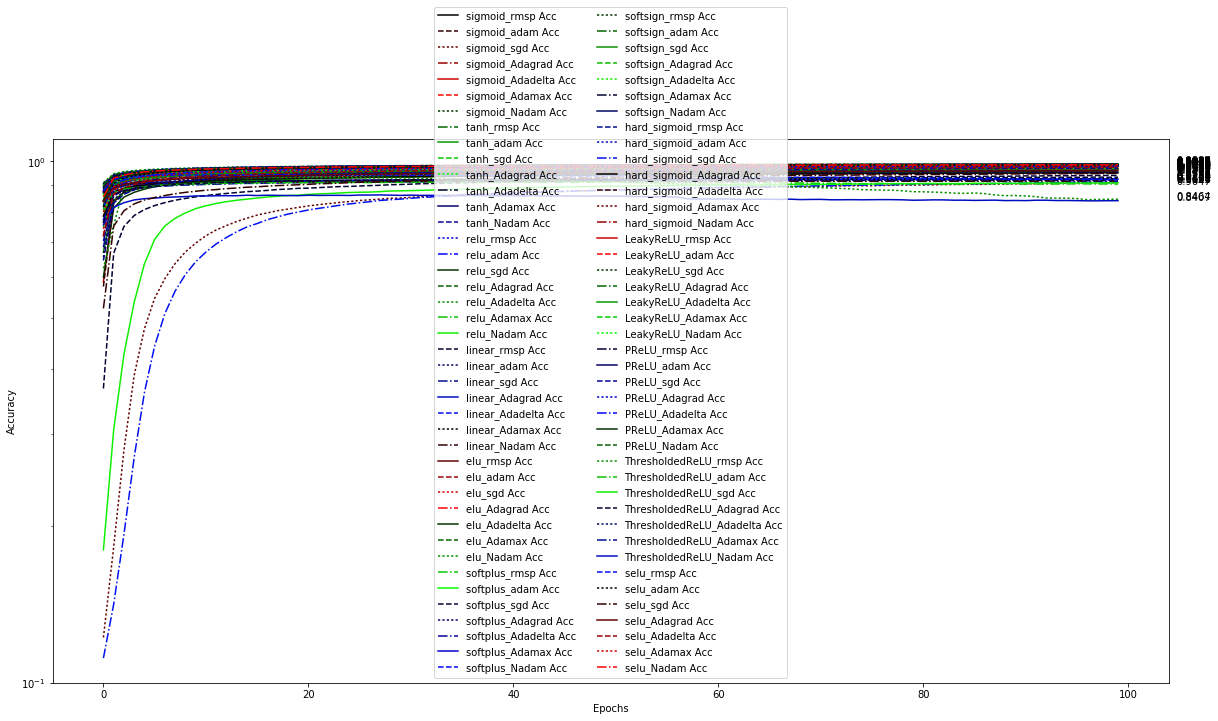

In [159]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

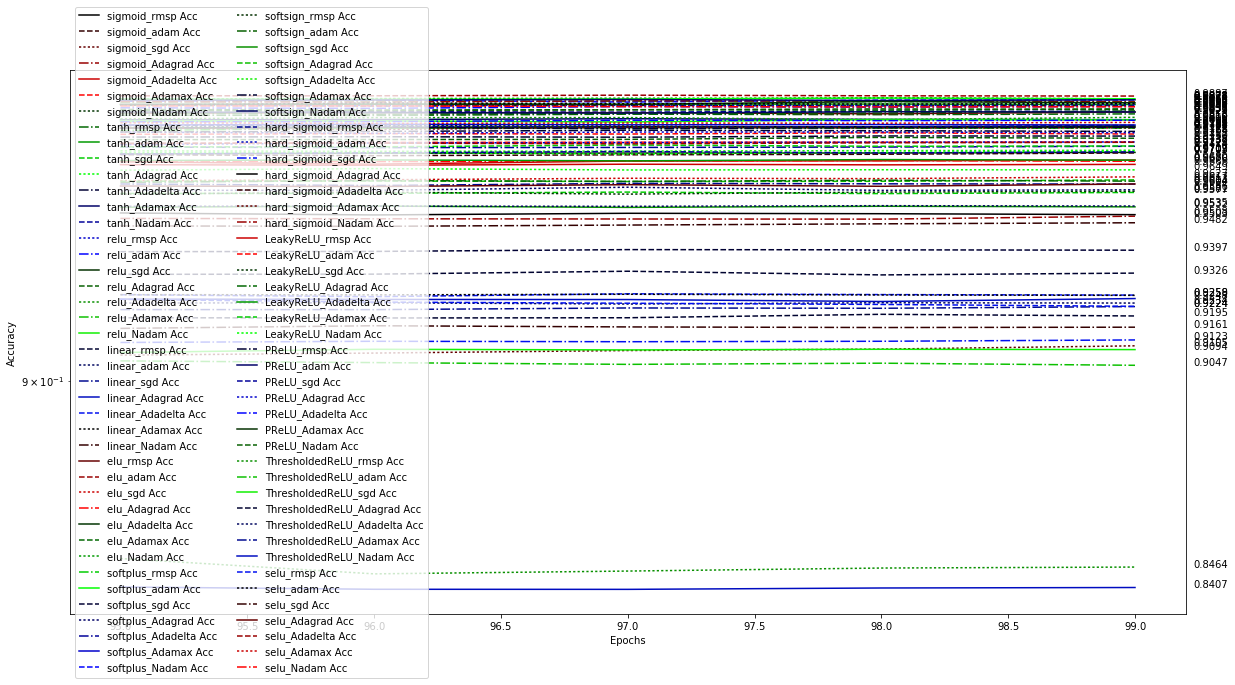

In [160]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [161]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

config       acc      loss  val_acc  val_loss       opt  \
29                  elu_adam  0.988687  0.033712  0.97968  0.089690      adam   
6              sigmoid_Nadam  0.987793  0.037723  0.97544  0.107565     Nadam   
36             softplus_adam  0.987787  0.037954  0.97702  0.105827      adam   
34                 elu_Nadam  0.987680  0.039620  0.97882  0.108755     Nadam   
64                PReLU_adam  0.987460  0.038732  0.97650  0.118037      adam   
41            softplus_Nadam  0.987423  0.042108  0.97602  0.123187     Nadam   
19               relu_Adamax  0.986827  0.040390  0.97728  0.095483    Adamax   
55        hard_sigmoid_Nadam  0.986770  0.040654  0.97450  0.110592     Nadam   
68              PReLU_Adamax  0.986487  0.040450  0.97770  0.095461    Adamax   
78                 selu_adam  0.986233  0.041855  0.97674  0.159491      adam   
8                  tanh_adam  0.985957  0.041617  0.97464  0.106411      adam   
50         hard_sigmoid_adam  0.985907  0.043277  0.97606  0.101438      adam   
1               sigmoid_adam  0.985620  0.043641  0.97500  0.103063      adam   
15                 relu_adam  0.985303  0.045998  0.97512  0.113523      adam   
83                selu_Nadam  0.985200  0.046654  0.97680  0.179598     Nadam   
33                elu_Adamax  0.984523  0.045499  0.98084  0.071118    Adamax   
69               PReLU_Nadam  0.984313  0.050563  0.97482  0.124574     Nadam   
43             softsign_adam  0.983850  0.048978  0.97454  0.099006      adam   
13                tanh_Nadam  0.983687  0.050334  0.97254  0.113199     Nadam   
48            softsign_Nadam  0.983500  0.050855  0.97432  0.101341     Nadam   
28                  elu_rmsp  0.983497  0.061194  0.97880  0.108794      rmsp   
7                  tanh_rmsp  0.982883  0.053859  0.97486  0.104121      rmsp   
18             relu_Adadelta  0.981770  0.061083  0.97630  0.101447  Adadelta   
12               tanh_Adamax  0.981003  0.057444  0.97680  0.083788    Adamax   
20                relu_Nadam  0.980980  0.061105  0.97308  0.126795     Nadam   
67            PReLU_Adadelta  0.980833  0.062821  0.97692  0.091229  Adadelta   
82               selu_Adamax  0.980127  0.060768  0.97884  0.113004    Adamax   
40           softplus_Adamax  0.979297  0.062319  0.97924  0.074658    Adamax   
49         hard_sigmoid_rmsp  0.979187  0.075251  0.97412  0.132470      rmsp   
0               sigmoid_rmsp  0.978913  0.074216  0.97536  0.117133      rmsp   
..                       ...       ...       ...      ...       ...       ...   
10              tanh_Adagrad  0.964903  0.112521  0.96992  0.099005   Adagrad   
30                   elu_sgd  0.962677  0.119972  0.97278  0.089128       sgd   
45          softsign_Adagrad  0.961723  0.125398  0.96590  0.111659   Adagrad   
59         LeakyReLU_Adagrad  0.961317  0.124699  0.96916  0.105576   Adagrad   
80              selu_Adagrad  0.960420  0.128891  0.97046  0.120758   Adagrad   
75    ThresholdedReLU_Adamax  0.960390  0.123845  0.96184  0.152807    Adamax   
38          softplus_Adagrad  0.958570  0.131712  0.97086  0.095806   Adagrad   
58             LeakyReLU_sgd  0.958117  0.137139  0.96798  0.104932       sgd   
9                   tanh_sgd  0.957740  0.136649  0.96728  0.105689       sgd   
74  ThresholdedReLU_Adadelta  0.953463  0.156975  0.96306  0.151015  Adadelta   
44              softsign_sgd  0.953203  0.153544  0.96220  0.122889       sgd   
52      hard_sigmoid_Adagrad  0.950757  0.164375  0.96182  0.126474   Adagrad   
3            sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   Adagrad   
79                  selu_sgd  0.948213  0.168605  0.96404  0.133931       sgd   
37              softplus_sgd  0.939670  0.193622  0.96046  0.124559       sgd   
73   ThresholdedReLU_Adagrad  0.932597  0.213993  0.95684  0.144692   Adagrad   
25           linear_Adadelta  0.925853  0.270814  0.92632  0.273785  Adadelta   
26             linear_Adamax  0.925773  0.267834  0.9

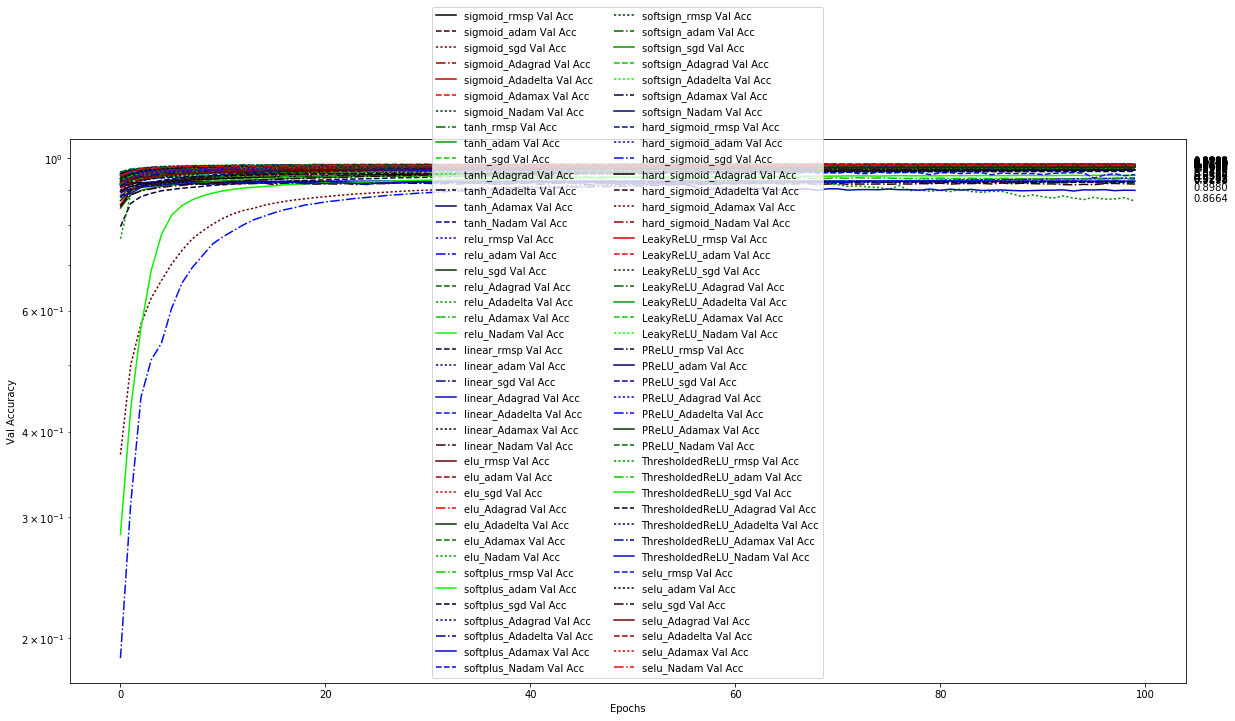

In [162]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

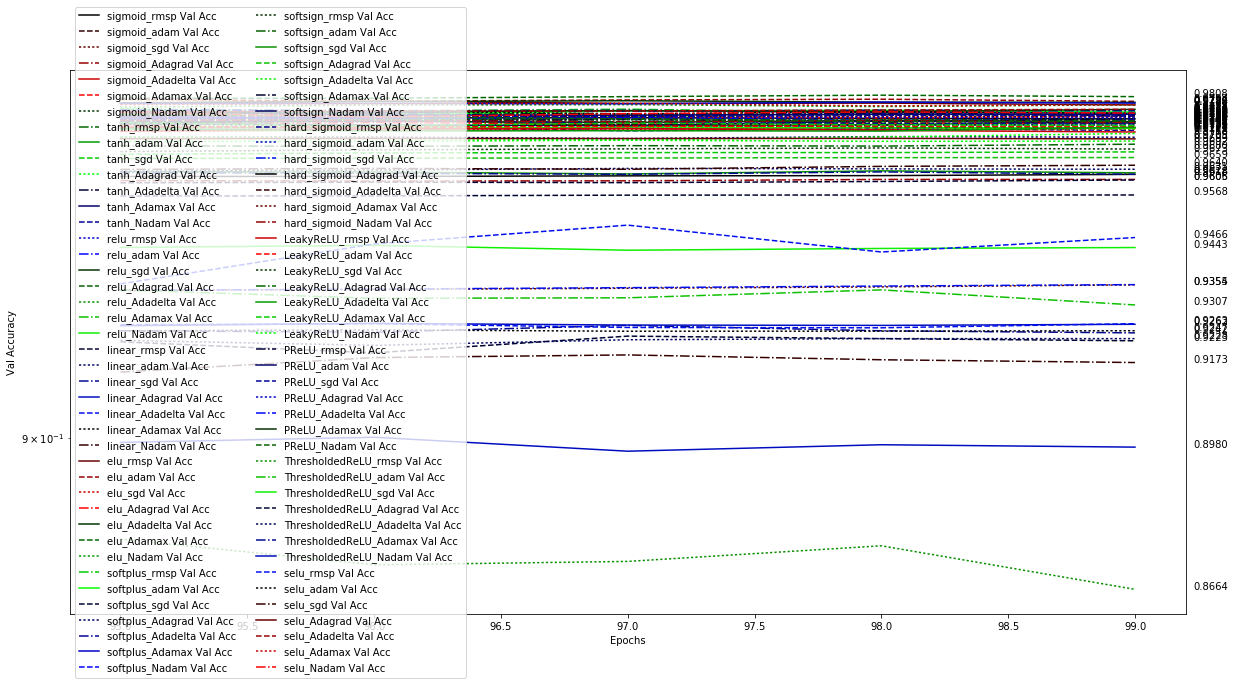

In [163]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [164]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

config       acc      loss  val_acc  val_loss       opt  \
33                elu_Adamax  0.984523  0.045499  0.98084  0.071118    Adamax   
29                  elu_adam  0.988687  0.033712  0.97968  0.089690      adam   
32              elu_Adadelta  0.978513  0.067637  0.97944  0.071386  Adadelta   
40           softplus_Adamax  0.979297  0.062319  0.97924  0.074658    Adamax   
82               selu_Adamax  0.980127  0.060768  0.97884  0.113004    Adamax   
34                 elu_Nadam  0.987680  0.039620  0.97882  0.108755     Nadam   
28                  elu_rmsp  0.983497  0.061194  0.97880  0.108794      rmsp   
81             selu_Adadelta  0.973717  0.084364  0.97772  0.105303  Adadelta   
68              PReLU_Adamax  0.986487  0.040450  0.97770  0.095461    Adamax   
39         softplus_Adadelta  0.972440  0.090753  0.97742  0.079648  Adadelta   
19               relu_Adamax  0.986827  0.040390  0.97728  0.095483    Adamax   
36             softplus_adam  0.987787  0.037954  0.97702  0.105827      adam   
67            PReLU_Adadelta  0.980833  0.062821  0.97692  0.091229  Adadelta   
83                selu_Nadam  0.985200  0.046654  0.97680  0.179598     Nadam   
12               tanh_Adamax  0.981003  0.057444  0.97680  0.083788    Adamax   
78                 selu_adam  0.986233  0.041855  0.97674  0.159491      adam   
11             tanh_Adadelta  0.975720  0.075027  0.97656  0.079506  Adadelta   
64                PReLU_adam  0.987460  0.038732  0.97650  0.118037      adam   
35             softplus_rmsp  0.978280  0.107673  0.97636  0.158071      rmsp   
18             relu_Adadelta  0.981770  0.061083  0.97630  0.101447  Adadelta   
65                 PReLU_sgd  0.970650  0.093120  0.97628  0.078734       sgd   
63                PReLU_rmsp  0.978543  0.088051  0.97614  0.130723      rmsp   
50         hard_sigmoid_adam  0.985907  0.043277  0.97606  0.101438      adam   
41            softplus_Nadam  0.987423  0.042108  0.97602  0.123187     Nadam   
5             sigmoid_Adamax  0.976383  0.073460  0.97598  0.082673    Adamax   
54       hard_sigmoid_Adamax  0.978373  0.067276  0.97574  0.082619    Adamax   
66             PReLU_Adagrad  0.973830  0.082395  0.97562  0.082568   Adagrad   
6              sigmoid_Nadam  0.987793  0.037723  0.97544  0.107565     Nadam   
47           softsign_Adamax  0.977220  0.070874  0.97538  0.086875    Adamax   
0               sigmoid_rmsp  0.978913  0.074216  0.97536  0.117133      rmsp   
..                       ...       ...       ...      ...       ...       ...   
62           LeakyReLU_Nadam  0.970883  0.093463  0.97178  0.125859     Nadam   
38          softplus_Adagrad  0.958570  0.131712  0.97086  0.095806   Adagrad   
80              selu_Adagrad  0.960420  0.128891  0.97046  0.120758   Adagrad   
10              tanh_Adagrad  0.964903  0.112521  0.96992  0.099005   Adagrad   
59         LeakyReLU_Adagrad  0.961317  0.124699  0.96916  0.105576   Adagrad   
58             LeakyReLU_sgd  0.958117  0.137139  0.96798  0.104932       sgd   
9                   tanh_sgd  0.957740  0.136649  0.96728  0.105689       sgd   
45          softsign_Adagrad  0.961723  0.125398  0.96590  0.111659   Adagrad   
79                  selu_sgd  0.948213  0.168605  0.96404  0.133931       sgd   
74  ThresholdedReLU_Adadelta  0.953463  0.156975  0.96306  0.151015  Adadelta   
44              softsign_sgd  0.953203  0.153544  0.96220  0.122889       sgd   
75    ThresholdedReLU_Adamax  0.960390  0.123845  0.96184  0.152807    Adamax   
52      hard_sigmoid_Adagrad  0.950757  0.164375  0.96182  0.126474   Adagrad   
3            sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   Adagrad   
37              softplus_sgd  0.939670  0.193622  0.96046  0.124559       sgd   
73   ThresholdedReLU_Adagrad  0.932597  0.213993  0.95684  0.144692   Adagrad   
77                 selu_rmsp  0.922440  0.924729  0.94664  0.690869      rmsp   
72       ThresholdedReLU_sgd  0.909360  0.283867  0.9

In [165]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
           config       acc      loss  val_acc  val_loss    opt       act  \
29       elu_adam  0.988687  0.033712  0.97968  0.089690   adam       elu   
6   sigmoid_Nadam  0.987793  0.037723  0.97544  0.107565  Nadam   sigmoid   
36  softplus_adam  0.987787  0.037954  0.97702  0.105827   adam  softplus   
34      elu_Nadam  0.987680  0.039620  0.97882  0.108755  Nadam       elu   
64     PReLU_adam  0.987460  0.038732  0.97650  0.118037   adam     PReLU   

    max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
29           98.0               66.0            99.0                20.0  
6            99.0               40.0            99.0                15.0  
36           99.0               67.0           100.0                28.0  
34           98.0               20.0            98.0                13.0  
64           98.0               37.0           100.0                15.0  

---Top by Val Accuracy---
             config       acc      los

In [166]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.5
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [167]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

index                    config       acc      loss  val_acc  val_loss  \
0      34                 elu_Nadam  0.987680  0.039620  0.97882  0.108755   
1      64                PReLU_adam  0.987460  0.038732  0.97650  0.118037   
2      15                 relu_adam  0.985303  0.045998  0.97512  0.113523   
3      20                relu_Nadam  0.980980  0.061105  0.97308  0.126795   
4       6             sigmoid_Nadam  0.987793  0.037723  0.97544  0.107565   
5      41            softplus_Nadam  0.987423  0.042108  0.97602  0.123187   
6      55        hard_sigmoid_Nadam  0.986770  0.040654  0.97450  0.110592   
7      14                 relu_rmsp  0.976800  0.124815  0.97424  0.190692   
8      63                PReLU_rmsp  0.978543  0.088051  0.97614  0.130723   
9      19               relu_Adamax  0.986827  0.040390  0.97728  0.095483   
10     35             softplus_rmsp  0.978280  0.107673  0.97636  0.158071   
11     13                tanh_Nadam  0.983687  0.050334  0.97254  0.113199   
12      8                 tanh_adam  0.985957  0.041617  0.97464  0.106411   
13     29                  elu_adam  0.988687  0.033712  0.97968  0.089690   
14     69               PReLU_Nadam  0.984313  0.050563  0.97482  0.124574   
15     36             softplus_adam  0.987787  0.037954  0.97702  0.105827   
16     57            LeakyReLU_adam  0.973780  0.081414  0.97350  0.107198   
17      7                 tanh_rmsp  0.982883  0.053859  0.97486  0.104121   
18     28                  elu_rmsp  0.983497  0.061194  0.97880  0.108794   
19     68              PReLU_Adamax  0.986487  0.040450  0.97770  0.095461   
20     50         hard_sigmoid_adam  0.985907  0.043277  0.97606  0.101438   
21     67            PReLU_Adadelta  0.980833  0.062821  0.97692  0.091229   
22     75    ThresholdedReLU_Adamax  0.960390  0.123845  0.96184  0.152807   
23     42             softsign_rmsp  0.978887  0.067614  0.97384  0.098522   
24     62           LeakyReLU_Nadam  0.970883  0.093463  0.97178  0.125859   
25      1              sigmoid_adam  0.985620  0.043641  0.97500  0.103063   
26     83                selu_Nadam  0.985200  0.046654  0.97680  0.179598   
27     78                 selu_adam  0.986233  0.041855  0.97674  0.159491   
28     33                elu_Adamax  0.984523  0.045499  0.98084  0.071118   
29     18             relu_Adadelta  0.981770  0.061083  0.97630  0.101447   
..    ...                       ...       ...       ...      ...       ...   
54     60        LeakyReLU_Adadelta  0.967997  0.105269  0.97330  0.099191   
55     30                   elu_sgd  0.962677  0.119972  0.97278  0.089128   
56     10              tanh_Adagrad  0.964903  0.112521  0.96992  0.099005   
57     80              selu_Adagrad  0.960420  0.128891  0.97046  0.120758   
58     38          softplus_Adagrad  0.958570  0.131712  0.97086  0.095806   
59     59         LeakyReLU_Adagrad  0.961317  0.124699  0.96916  0.105576   
60     74  ThresholdedReLU_Adadelta  0.953463  0.156975  0.96306  0.151015   
61     58             LeakyReLU_sgd  0.958117  0.137139  0.96798  0.104932   
62     45          softsign_Adagrad  0.961723  0.125398  0.96590  0.111659   
63      9                  tanh_sgd  0.957740  0.136649  0.96728  0.105689   
64     44              softsign_sgd  0.953203  0.153544  0.96220  0.122889   
65     71      ThresholdedReLU_adam  0.904667  0.283608  0.93070  0.258944   
66     79                  selu_sgd  0.948213  0.168605  0.96404  0.133931   
67     52      hard_sigmoid_Adagrad  0.950757  0.164375  0.96182  0.126474   
68      3           sigmoid_Adagrad  0.950277  0.167456  0.96060  0.128328   
69     77                 selu_rmsp  0.922440  0.924729  0.94664  0.690869   
70     37              softplus_sgd  0.939670  0.193622  0.96046  0.124559   
71     73   ThresholdedReLU_Adagrad  0.932597  0.213993  0.95684  0.144692   
72     21               linear_rmsp  0.919507  0.296305  0.92234  0.294638   
73     24            linea

In [168]:
sorted_by_score.to_csv('./results_fixed_lr.csv')

In [169]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
